## Spam Filtering
In this programming assignment, we will `revisit' Spam Filtering case study with a real data set that has a "label" for every email - i.e. spam or not spam. We will try Logistic Regression, Decision Tree and Random Forests. The assignment goes from data loading to data inspection to data pre-processing to creating a train/test data set to finally doing machine learning, making predictions and evaluating it. This is typically one part of the "full pipeline" in ML modeling/prototyping - So you will get a sampler taste of some "prototype pipeline" work that happens in practice! Have fun!! And if you get stuck somewhere - Use discord - Maybe someone has a suggestion that will unblock you.

## Loading the data set

In [9]:
import pandas as pd


X2_train = pd.read_csv('X1_train.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_train = pd.read_csv('y1_train.csv',sep=',',header=None,engine='python',error_bad_lines=False)
X2_test = pd.read_csv('X1_test.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_test = pd.read_csv('y1_test.csv',sep=',',header=None,engine='python',error_bad_lines=False)
X2_val = pd.read_csv('X1_val.csv',sep=',',header=None,engine='python',error_bad_lines=False)
y2_val = pd.read_csv('y1_val.csv',sep=',',header=None,engine='python',error_bad_lines=False)

C:\Users\Winston\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. Data Pre-Processing Step
Follow data processing steps as in previous HW (HW 5 Part 2) - Feel free to add any processing steps that might help with the new models you will try out in this HW - LR and Random Forest.
Also create the train/val/test splits as before (HW 5 part 2) for the emails data set.


In [10]:

X2_val.head()

,0,1
0,tweet_index,tweet
1,2049781431,@Koppite4004 I always get over-excited when th...
2,2186813755,Working on tonight's post
3,2251415926,Gonna try n fall back 2 sleep! Dream of my &qu...
4,2247456751,@danishmarie I remember watching him since ......


In [11]:
from nltk.tokenize import word_tokenize
X2_train['tokenized'] = X2_train[1].apply(lambda x: word_tokenize(x))
X2_val['tokenized'] = X2_val[1].apply(lambda x: word_tokenize(x))
X2_test['tokenized'] = X2_test[1].apply(lambda x: word_tokenize(x))

X2_train.to_csv('X2_train_tokenized.cvs')
X2_val.to_csv('X2_val_tokenized.cvs')
X2_test.to_csv('X2_test_tokenized.cvs')

In [12]:
from nltk.corpus import stopwords
X2_train['filtered_words'] = X2_train['tokenized'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
X2_val['filtered_words'] = X2_val['tokenized'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])
X2_test['filtered_words'] = X2_test['tokenized'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

X2_train.to_csv('X2_train_filtered_words.cvs')
X2_val.to_csv('X2_val_filtered_words.cvs')
X2_test.to_csv('X2_test_filtered_words.cvs')


In [13]:
import pandas as pd
X2_train['new_words'] = X2_train['filtered_words'].apply(lambda x: [word for word in x if word.isalnum()])
X2_val['new_words'] = X2_val['filtered_words'].apply(lambda x: [word for word in x if word.isalnum()])
X2_test['new_words'] = X2_test['filtered_words'].apply(lambda x: [word for word in x if word.isalnum()])

X2_train.to_csv('X2_train_new_words.cvs')
X2_val.to_csv('X2_val_new_words.cvs')
X2_test.to_csv('X2_test_new_words.cvs')

X2_train = pd.read_csv('X2_train_new_words.cvs',sep=',',header=None,engine='python',error_bad_lines=False)
X2_val = pd.read_csv('X2_val_new_words.cvs',sep=',',header=None,engine='python',error_bad_lines=False)
X2_test = pd.read_csv('X2_test_new_words.cvs',sep=',',header=None,engine='python',error_bad_lines=False)


C:\Users\Winston\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
X2_train.columns = X2_train.iloc[0] 
X2_train = X2_train[1:]


X2_val.columns = X2_val.iloc[0] 
X2_val = X2_val[1:]

X2_test.columns = X2_test.iloc[0] 
X2_test = X2_test[1:]


In [15]:
X2_train.set_axis(['a', 'tweet_index','tweet','tokenized','filtered_words','new_words'], axis=1, inplace=False)
X2_val.set_axis(['a', 'tweet_index','tweet','tokenized','filtered_words','new_words'], axis=1, inplace=False)
X2_test.set_axis(['a', 'tweet_index','tweet','tokenized','filtered_words','new_words'], axis=1, inplace=False)

,a,tweet_index,tweet,tokenized,filtered_words,new_words
1,0.0,tweet_index,tweet,['tweet'],['tweet'],['tweet']
2,1.0,1994530242,@bwatwood i'm at the university of central flo...,"['@', 'bwatwood', 'i', ""'m"", 'at', 'the', 'uni...","['@', 'bwatwood', ""'m"", 'university', 'central...","['bwatwood', 'university', 'central', 'florida..."
3,2.0,1975024899,@LouiseGeek LOL he is class thought cool as Ow...,"['@', 'LouiseGeek', 'LOL', 'he', 'is', 'class'...","['@', 'LouiseGeek', 'LOL', 'class', 'thought',...","['LouiseGeek', 'LOL', 'class', 'thought', 'coo..."
4,3.0,2180684802,@MissChriis saad i miss you too i'm bored as ...,"['@', 'MissChriis', 'saad', 'i', 'miss', 'you'...","['@', 'MissChriis', 'saad', 'miss', ""'m"", 'bor...","['MissChriis', 'saad', 'miss', 'bored', 'hell'..."
5,4.0,1684965598,"@KarmaElite @dreamsneverend Yeah, but the girl...","['@', 'KarmaElite', '@', 'dreamsneverend', 'Ye...","['@', 'KarmaElite', '@', 'dreamsneverend', 'Ye...","['KarmaElite', 'dreamsneverend', 'Yeah', 'girl..."
...,...,...,...,...,...,...
262019,262018.0,1965770450,@furina1975 Nice! I like it,"['@', 'furina1975', 'Nice', '!', 'I', 'like', ...","['@', 'furina1975', 'Nice', '!', 'I', 'like']","['furina1975', 'Nice', 'I', 'like']"
262020,262019.0,1989790543,@JustHendo exactly. Its sad. Her kids r gonna ...,"['@', 'JustHendo', 'exactly', '.', 'Its', 'sad...","['@', 'JustHendo', 'exactly', '.', 'Its', 'sad...","['JustHendo', 'exactly', 'Its', 'sad', 'Her', ..."
262021,262020.0,1966748540,Looks like I'm not going to the forgive durden...,"['Looks', 'like', 'I', ""'m"", 'not', 'going', '...","['Looks', 'like', 'I', ""'m"", 'going', 'forgive...","['Looks', 'like', 'I', 'going', 'forgive', 'du..."
262022,262021.0,1469845049,@jennygirl7 No need to beg...I don't want to h...,"['@', 'jennygirl7', 'No', 'need', 'to', 'beg',...","['@', 'jennygirl7', 'No', 'need', 'beg', '...'...","['jennygirl7', 'No', 'need', 'beg', 'I', 'want..."


In [16]:
X2_train.head()

,NaN,0,1,tokenized,filtered_words,new_words
1,0.0,tweet_index,tweet,['tweet'],['tweet'],['tweet']
2,1.0,2048594990,"@mantic59 Cool link, but you got an extra T in...","['@', 'mantic59', 'Cool', 'link', ',', 'but', ...","['@', 'mantic59', 'Cool', 'link', ',', 'got', ...","['mantic59', 'Cool', 'link', 'got', 'extra', '..."
3,2.0,1826490984,@miizluna_jessie tell your mommy i said hiiiii!,"['@', 'miizluna_jessie', 'tell', 'your', 'momm...","['@', 'miizluna_jessie', 'tell', 'mommy', 'sai...","['tell', 'mommy', 'said', 'hiiiii']"
4,3.0,2014223469,Ten o'clock coffee,"['Ten', ""o'clock"", 'coffee']","['Ten', ""o'clock"", 'coffee']","['Ten', 'coffee']"
5,4.0,2068667671,ive had some food now i have the sneezies lol,"['ive', 'had', 'some', 'food', 'now', 'i', 'ha...","['ive', 'food', 'sneezies', 'lol']","['ive', 'food', 'sneezies', 'lol']"


In [17]:
from sklearn.model_selection import train_test_split
train_data = X2_train
rem_data = X2_train.drop(train_data.index).reset_index(drop=True)
val_data = X2_val
test_data = X2_test

# train_data = data_set.sample(frac=0.8, random_state=25).reset_index(drop=True)
# rem_data = data_set.drop(train_data.index).reset_index(drop=True)
# val_data = rem_data.sample(frac=0.5, random_state=25).reset_index(drop=True)
# test_data = rem_data.drop(val_data.index).reset_index(drop=True)

In [18]:
train_data = train_data.drop(['tokenized'], axis = 1)
train_data = train_data.drop(['filtered_words'], axis = 1)
test_data = test_data.drop(['tokenized'], axis = 1)
test_data = test_data.drop(['filtered_words'], axis = 1)
val_data = val_data.drop(['tokenized'], axis = 1)
val_data = val_data.drop(['filtered_words'], axis = 1)

In [19]:
print(train_data.shape)
train_data.head()

(917074, 4)


,NaN,0,1,new_words
1,0.0,tweet_index,tweet,['tweet']
2,1.0,2048594990,"@mantic59 Cool link, but you got an extra T in...","['mantic59', 'Cool', 'link', 'got', 'extra', '..."
3,2.0,1826490984,@miizluna_jessie tell your mommy i said hiiiii!,"['tell', 'mommy', 'said', 'hiiiii']"
4,3.0,2014223469,Ten o'clock coffee,"['Ten', 'coffee']"
5,4.0,2068667671,ive had some food now i have the sneezies lol,"['ive', 'food', 'sneezies', 'lol']"


In [20]:
print(val_data.shape)
val_data.head()

(131012, 4)


,NaN,0,1,new_words
1,0.0,tweet_index,tweet,['tweet']
2,1.0,2049781431,@Koppite4004 I always get over-excited when th...,"['Koppite4004', 'I', 'always', 'get', 'fixture..."
3,2.0,2186813755,Working on tonight's post,"['Working', 'tonight', 'post']"
4,3.0,2251415926,Gonna try n fall back 2 sleep! Dream of my &qu...,"['Gon', 'na', 'try', 'n', 'fall', 'back', '2',..."
5,4.0,2247456751,@danishmarie I remember watching him since ......,"['danishmarie', 'I', 'remember', 'watching', '..."


In [21]:
print(test_data.shape)
test_data.head()

(262023, 4)


,NaN,0,1,new_words
1,0.0,tweet_index,tweet,['tweet']
2,1.0,1994530242,@bwatwood i'm at the university of central flo...,"['bwatwood', 'university', 'central', 'florida..."
3,2.0,1975024899,@LouiseGeek LOL he is class thought cool as Ow...,"['LouiseGeek', 'LOL', 'class', 'thought', 'coo..."
4,3.0,2180684802,@MissChriis saad i miss you too i'm bored as ...,"['MissChriis', 'saad', 'miss', 'bored', 'hell'..."
5,4.0,1684965598,"@KarmaElite @dreamsneverend Yeah, but the girl...","['KarmaElite', 'dreamsneverend', 'Yeah', 'girl..."


## 2. Logistic Regression
Below, try out LR with/without regression on spam filtering. Which model gives you best validation error? What role does regularization play here? Which regularizer works best? Which of these models are more interpretable? And how can you see that? Are any of the issues you saw with Naive Bayes method resolved with LR? What are any limitations you see with your LR model?

In [22]:
print(X2_train.head())

0  NaN            0                                                  1  \
1  0.0  tweet_index                                              tweet   
2  1.0   2048594990  @mantic59 Cool link, but you got an extra T in...   
3  2.0   1826490984   @miizluna_jessie tell your mommy i said hiiiii!    
4  3.0   2014223469                                Ten o'clock coffee    
5  4.0   2068667671     ive had some food now i have the sneezies  lol   

0                                          tokenized  \
1                                          ['tweet']   
2  ['@', 'mantic59', 'Cool', 'link', ',', 'but', ...   
3  ['@', 'miizluna_jessie', 'tell', 'your', 'momm...   
4                       ['Ten', "o'clock", 'coffee']   
5  ['ive', 'had', 'some', 'food', 'now', 'i', 'ha...   

0                                     filtered_words  \
1                                          ['tweet']   
2  ['@', 'mantic59', 'Cool', 'link', ',', 'got', ...   
3  ['@', 'miizluna_jessie', 'tell', 'mommy', 'sai.

In [25]:
# Your code here for LR with and without regularization 
# including obtaining validation errors.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

y_train = y2_train[1]
y_test = y2_test[1]
y_val = y2_val[1]

cv = CountVectorizer(binary=False, max_df=0.95) 
cv.fit(train_data['1']) # To get a dictionary
train_feature_set = cv.transform(train_data['1'])
test_feature_set = cv.transform(test_data['1'])
val_feature_set = cv.transform(val_data['1'])

def LR():
    clf = LogisticRegression(solver='saga')
    clf.fit(train_feature_set, y_train)

    pred = clf.predict(val_feature_set)
    print('Results of LR')
    print('Accuracy: ', accuracy_score(y_val, pred))
    print('Precision: ', precision_score(y_val, pred, average='micro'))
    print('Recall: ', recall_score(y_val, pred, average='micro'))
    print('f1 score: ',f1_score(y_val, pred, average='micro'))
    
    print('aaaa')
    df1 = pd.DataFrame(X2_val)
    df1['Prediction'] = pred
    df1 = df1.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df1.to_csv('LRout.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, val_feature_set, y_val)  
    plt.show()
    print('aaaa')

def LR_Regularized():
    clf = LogisticRegression(solver='liblinear', penalty = 'l1')
    clf.fit(train_feature_set, y_train)

    pred = clf.predict(val_feature_set)
    
    print('Results of LR_Regularized')
    print('Accuracy: ', accuracy_score(y_val, pred))
    print('Precision: ', precision_score(y_val, pred, average='micro'))
    print('Recall: ', recall_score(y_val, pred, average='micro'))
    print('f1 score: ',f1_score(y_val, pred, average='micro'))
    
    print('aaaa')
    df2 = pd.DataFrame(X2_val)
    df2['Prediction'] = pred
    df2 = df2.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df2.to_csv('LR_Reg_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, val_feature_set, y_val)  
    plt.show()
    print('aaaa')

def LR_best_hyperparam():
    clf = LogisticRegression(solver='liblinear', penalty = 'l2')
    clf.fit(train_feature_set, y_train)

    pred = clf.predict(val_feature_set)
    
    print('Results of LR_best_hyperparam')
    print('Accuracy: ', accuracy_score(y_val, pred))
    print('Precision: ', precision_score(y_val, pred, average='micro'))
    print('Recall: ', recall_score(y_val, pred, average='micro'))
    print('f1 score: ',f1_score(y_val, pred, average='micro'))
    
    print('aaaa')
    df3 = pd.DataFrame(X2_val)
    df3['Prediction'] = pred
    df3 = df3.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df3.to_csv('LR_best_hyper_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, val_feature_set, y_val)  
    plt.show()
    print('aaaa')

C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Results of LR
Accuracy:  0.7970872897139193
Precision:  0.7970872897139193
Recall:  0.7970872897139193
f1 score:  0.7970872897139194
aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


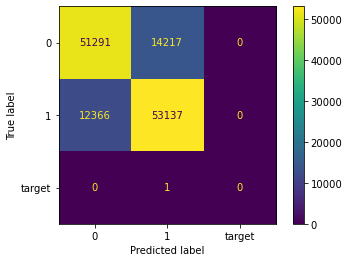

aaaa


In [26]:
LR()

Results of LR_Regularized
Accuracy:  0.7965987848441364
Precision:  0.7965987848441364
Recall:  0.7965987848441364
f1 score:  0.7965987848441364
aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


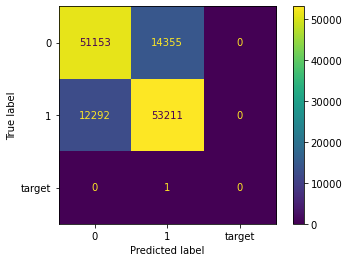

aaaa


In [27]:
LR_Regularized()

Results of LR_best_hyperparam
Accuracy:  0.7965835190669557
Precision:  0.7965835190669557
Recall:  0.7965835190669557
f1 score:  0.7965835190669557
aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


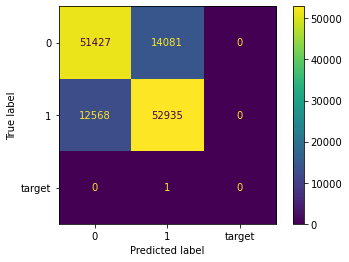

aaaa


In [28]:
LR_best_hyperparam()

## 3. Decision Tree
Train a DT on the same data set. Let depth of the tree be a hyper-param. Which depth gives you the best validation error? What are the top 20 features as per the DT? How do they compare to the top 20 features from LR?

In [29]:
# Your code here for DT
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

def DT():
    clf = DecisionTreeClassifier()
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(val_feature_set)
    
    print('Results of DT')
    print('Accuracy: ', accuracy_score(y_val, pred))
    print('Precision: ', precision_score(y_val, pred, average='micro'))
    print('Recall: ', recall_score(y_val, pred, average='micro'))
    print('f1 score: ',f1_score(y_val, pred, average='micro'))
    
    print('aaaa')
    df4 = pd.DataFrame(X2_val)
    df4['Prediction'] = pred
    df4 = df4.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df4.to_csv('DT_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, val_feature_set, y_val)  
    plt.show()
    print('aaaa')
    
def DT_best_tree_depth():
    clf = DecisionTreeClassifier(max_depth=60)
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(val_feature_set)
    
    print('Results of DT_best_tree_depth')
    print('Accuracy: ', accuracy_score(y_val, pred))
    print('Precision: ', precision_score(y_val, pred, average='micro'))
    print('Recall: ', recall_score(y_val, pred, average='micro'))
    print('f1 score: ',f1_score(y_val, pred, average='micro'))
    
    print('aaaa')
    df5 = pd.DataFrame(X2_val)
    df5['Prediction'] = pred
    df5 = df5.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df5.to_csv('DT_best_tree_depth_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, val_feature_set, y_val)  
    plt.show()
    print('aaaa')

Results of DT
Accuracy:  0.7301621225536592
Precision:  0.7301621225536592
Recall:  0.7301621225536592
f1 score:  0.7301621225536591
aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


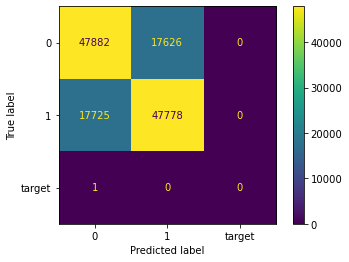

aaaa


In [30]:
DT()

Results of DT_best_tree_depth
Accuracy:  0.7076679998778738
Precision:  0.7076679998778738
Recall:  0.7076679998778738
f1 score:  0.7076679998778738
aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


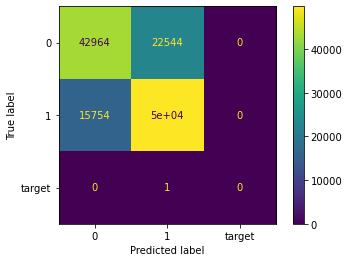

aaaa


In [31]:
DT_best_tree_depth()

## 4. Random Forests
To improve upon DTs you decide to implement a Random Forest. The hyper-params are number of DTs and depth per tree. How does the performance of Random Forest compare against the DT you trained earlier. How does the validation error compare? Also how do the precision/recall compare between DT and Random Forest on test set?

In [32]:
# Your code here for Random Forest
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

def random_forest():
    clf = RandomForestClassifier(max_depth = 1)
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(val_feature_set)
    
    print('Results of Random Forest')
    print('Accuracy: ', accuracy_score(y_val, pred))
    print('Precision: ', precision_score(y_val, pred, average='micro'))
    print('Recall: ', recall_score(y_val, pred, average='micro'))
    print('f1 score: ',f1_score(y_val, pred, average='micro'))
    
    print('aaaa')
    df6 = pd.DataFrame(X2_val)
    df6['Prediction'] = pred
    df6 = df6.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df6.to_csv('random_forest_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, val_feature_set, y_val)  
    plt.show()
    print('aaaa')
    

def random_forest_hyperparam_tuning():
    clf = RandomForestClassifier(max_depth=10, random_state=42)
    clf.fit(train_feature_set, y_train)
    pred = clf.predict(val_feature_set)
    
    print('Results of Random Forest')
    print('Accuracy: ', accuracy_score(y_val, pred))
    print('Precision: ', precision_score(y_val, pred, average='micro'))
    print('Recall: ', recall_score(y_val, pred, average='micro'))
    print('f1 score: ',f1_score(y_val, pred, average='micro'))
    
    print('aaaa')
    df7 = pd.DataFrame(X2_val)
    df7['Prediction'] = pred
    df7 = df7.set_axis(['a', 'b','c','d','e','f','Prediction'], axis=1, inplace=False)
    #print(df)
    header = ["b", "Prediction"]
    df7.to_csv('random_forest_out.csv', columns = header, header=False,index=False)
    plot_confusion_matrix(clf, val_feature_set, y_val)  
    plt.show()
    print('aaaa')


    

Results of Random Forest
Accuracy:  0.5806719995114952
Precision:  0.5806719995114952
Recall:  0.5806719995114952
f1 score:  0.5806719995114952
aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


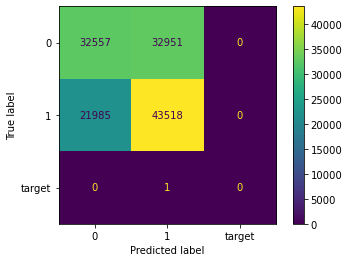

aaaa


In [33]:
random_forest()

Results of Random Forest
Accuracy:  0.715132964919244
Precision:  0.715132964919244
Recall:  0.715132964919244
f1 score:  0.715132964919244
aaaa


C:\Users\Winston\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


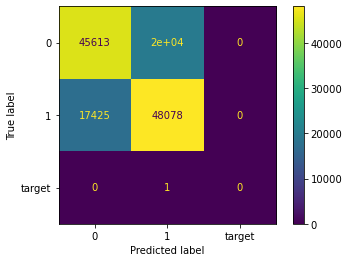

aaaa


In [34]:
random_forest_hyperparam_tuning()

## 5. Overall
What are your insights from training these models? Which models are good at what? Which ML model would you use in practice for spam filtering?

I would use Logistic Regression as they yield better results.